In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import HTML
from matplotlib import animation

In [2]:
def scale(fromlim, tolim):
    
    A, B = fromlim
    C, D = tolim
    
    return lambda x: C*(1 - (x - A)/(B - A)) + D*((x - A) / (B - A))

In [7]:
def ortho_curve(f, f_, xlim, ylim, frames=20, interval=700, line_len=.1):
    
    ft = lambda x, xi: f(xi) + f_(xi)*(x - xi)
    fo = lambda x, xi: f(xi) - (1 / f_(xi))*(x - xi)
    
    x = np.linspace(xlim[0], xlim[1], 100)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_ylim(ylim)
    
    _, = ax.plot(x, f(x))
    _, = ax.plot(x, np.zeros_like(x))
    line, = ax.plot([], [])
    line2, = ax.plot([], [])
    
    scale_ = scale((0, frames - 1), xlim)
    
    def init():
        
        return (line,)
    
    def animate(i):
        
        x0 = scale_(i)
        x_ = np.linspace(x0 - line_len, x0 + line_len, 20)
        y = ft(x_, x0)
        line.set_data(x_, y)
        yo = fo(x_, x0)
        line2.set_data(x_, yo)

        return (line, line2, )
    
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames, interval = interval)
    
    return anim

In [8]:
f = lambda x: x**2
f_ = lambda x: 2*x

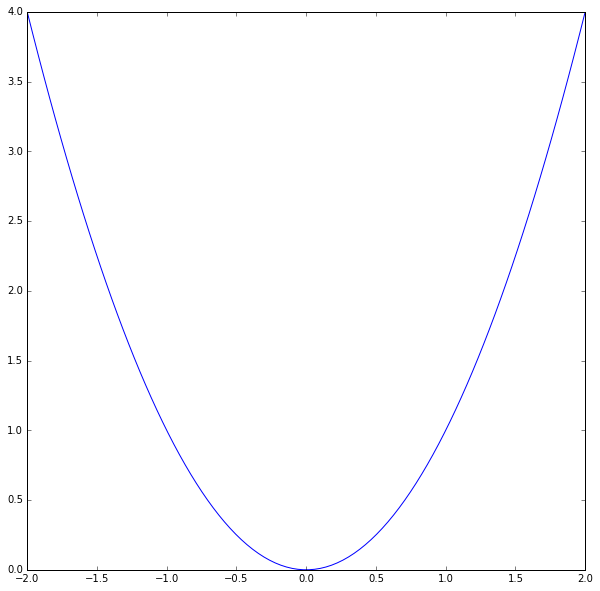

In [9]:
anim = ortho_curve(f, f_, xlim=(-2, 2), ylim=(0, 4), line_len=.3)

In [10]:
HTML(anim.to_html5_video())